In [2]:
from CTGAN import *

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set global random seed
np.random.seed(42)

!! THINGS TO FIX !!

- Leakage? As not splitting out dataset before training model
- Huge variability in metrics between runs. Cross val? Set seed?
- Add support for discrete columns (pass to fit) 
- Actually look at what is causing the warnings...

# Setup

In [5]:
i_ds1 = SDVInputDataset(filepath='../data/back_pain.csv',
                       header=0)
o_ds1 = SDVOutputDataset(len(i_ds1.dataset))
rp_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'])

In [6]:
i_ds1.dataset.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [7]:
rp_ds1.models_to_run

['ctgan', 'copulagan', 'tvae']

# Generate Data

In [8]:
test_dict = sdv_dataset_synthesizer(input_dataset=i_ds1,
                            output_dataset=o_ds1,
                            run_params=rp_ds1)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 18.34it/s]

Running for ctgan
Running for copulagan
Running for tvae


In [9]:
test_dict['real'] = i_ds1.dataset

In [10]:
for item in test_dict.keys():
    print(item)

ctgan
copulagan
tvae
real


# Explore Datasets

In [11]:
test_dict['ctgan']

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,30.627569,28.842140,58.047478,12.987099,119.386149,84.306842,0.846014,9.104215,11.948594,7.230989,-24.930550,15.800441,Normal,Attribute10= cervical_tilt(numeric)
1,90.780982,14.814641,97.801206,47.127494,120.054015,159.430205,0.559772,23.407285,14.199344,8.205837,-20.379489,13.824068,Abnormal,Attribute11=sacrum_angle(numeric)
2,47.633398,14.063302,115.166856,13.985250,123.166147,5.460777,0.483465,12.990757,13.194930,10.084703,-32.719001,40.703666,Normal,Attribute7= pelvic_slope(numeric)
3,69.993051,17.073708,52.378534,13.943830,128.861969,114.515141,0.206864,35.392721,10.201036,10.833267,-3.420277,31.889424,Abnormal,NaN
4,62.737192,-5.379000,30.207009,13.343986,126.573747,22.942444,0.388777,13.027802,8.835637,15.105467,-42.651595,16.211062,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,44.120406,21.230857,68.818735,35.126999,73.491765,87.678612,0.576529,43.642535,12.343168,10.410325,-14.598961,10.248216,Normal,NaN
306,92.341438,19.464412,32.589637,66.590187,114.118498,5.308776,0.954073,17.361295,8.106131,9.493373,-18.823159,35.782961,Abnormal,NaN
307,36.564748,21.361937,48.699258,11.789975,115.336319,7.999617,1.111467,35.196733,15.978477,10.329954,-8.143801,12.705678,Abnormal,Attribute8= Direct_tilt(numeric)
308,46.986529,28.461009,45.248733,26.893230,126.026525,16.778940,0.233616,17.477011,11.894691,6.799014,-30.796813,44.608326,Abnormal,NaN


In [12]:
test_dict['copulagan']

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,91.498559,8.661982,60.682510,14.556646,119.188834,-14.308683,0.049474,22.303227,7.852994,7.073857,6.413680,27.583730,Normal,Prediction is done by using binary classificat...
1,44.128625,25.634309,83.156501,10.486118,104.186073,-15.888252,0.442221,36.172621,18.649873,10.319317,5.285187,43.520991,Abnormal,NaN
2,43.123141,31.337970,46.062238,36.064127,117.293825,-10.959671,0.545893,18.065568,13.448484,7.469912,-5.313160,44.268173,Abnormal,Attribute2 = pelvic_tilt (numeric)
3,55.262976,19.346531,45.178639,49.096374,119.948956,-6.843819,0.225706,19.750527,10.010774,7.978409,6.880618,32.654136,Normal,NaN
4,49.511999,19.779622,46.571445,43.799736,124.241215,-8.806720,0.017739,35.149755,10.711998,8.747527,6.039726,44.132481,Normal,Attribute3 = lumbar_lordosis_angle (numeric)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,57.660620,19.171406,28.375605,18.661019,109.339525,-6.533561,0.747896,22.809019,7.371051,8.762170,3.046239,44.339624,Abnormal,NaN
306,36.491002,48.423811,44.026155,30.310471,125.772580,0.878305,0.333355,12.225584,14.194684,7.164202,5.825536,29.936268,Abnormal,NaN
307,73.232533,12.667748,53.885084,25.658318,113.412449,-13.651616,0.068014,8.906946,14.966929,15.897821,-12.001147,15.806358,Abnormal,NaN
308,62.084914,8.978585,79.647377,35.982947,98.237729,81.961778,0.030956,27.864348,7.128947,7.496060,6.861614,44.258325,Normal,NaN


In [13]:
test_dict['tvae']

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,79.581553,15.243865,66.931918,25.871928,113.944866,49.837230,0.779633,7.622041,14.298220,11.548880,-26.661144,38.278325,Abnormal,NaN
1,73.470608,25.472750,35.671935,30.989922,121.104065,46.062974,0.128397,10.878466,16.306641,7.882840,-26.348304,24.589851,Normal,Attribute2 = pelvic_tilt (numeric)
2,65.657711,33.327104,42.447995,33.008498,119.133745,90.544191,0.825197,13.532002,13.232478,8.094021,-26.531006,21.710270,Normal,Attribute8= Direct_tilt(numeric)
3,77.569148,33.360383,46.857370,54.702995,123.333625,68.116821,0.696295,11.770320,10.253254,11.701368,-28.544135,16.673206,Abnormal,Attribute8= Direct_tilt(numeric)
4,52.032527,32.514017,46.076209,52.769749,116.241224,82.009409,0.836292,12.679696,14.023649,11.302201,-29.198938,27.213809,Normal,Attribute2 = pelvic_tilt (numeric)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,68.421043,27.858223,49.855184,30.365018,127.240216,79.276540,0.772690,12.196126,15.477804,8.765399,-31.690087,14.196160,Abnormal,NaN
306,65.164455,19.517561,37.341686,50.251341,119.812108,47.925620,0.745264,13.440683,11.603418,8.850165,-32.147403,22.209683,Abnormal,"Attribute class {Abnormal, Normal}"
307,69.919115,27.688157,49.187733,35.605303,124.589384,72.669148,0.515662,13.699199,10.490602,9.108268,-31.466048,27.345268,Normal,Prediction is done by using binary classificat...
308,45.330219,25.671759,49.074480,37.117790,119.836449,61.322458,0.290307,11.813912,14.891338,7.929608,-23.639090,19.896198,Normal,Prediction is done by using binary classificat...


## Dataset characteristics

In [14]:
test_dict['ctgan'].describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.092890,18.211728,59.806718,29.354834,121.798303,39.363958,0.570751,24.877457,11.687611,9.903266,-22.707738,18.104481
std,17.277554,12.155798,22.688547,14.675945,17.286957,49.037618,0.352787,10.360258,3.937174,2.472782,14.060401,11.339201
min,23.578459,-12.063231,14.133631,3.953535,67.709793,-17.703219,-0.216826,4.151202,3.301869,4.631743,-49.003554,-3.852766
25%,48.303289,9.120443,45.242433,17.916509,110.977067,10.265535,0.289031,17.303322,8.617404,8.378720,-34.199149,9.746881
50%,58.811064,17.891575,58.068980,27.492546,122.937018,17.241287,0.597336,21.827349,11.969450,9.770975,-22.108100,17.445876
75%,69.541916,25.322222,71.212906,39.384229,133.444718,63.645900,0.860597,33.450386,14.573050,11.333619,-11.800035,25.533018
max,110.196275,55.217546,125.934442,70.296435,164.787922,201.816083,1.279372,46.733409,20.624113,17.845203,10.846055,48.532329


In [15]:
test_dict['copulagan'].describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,57.368722,26.639421,62.094208,30.081176,117.014346,1.331854,0.466929,21.349224,13.986080,9.013022,-5.252403,37.089160
std,15.897064,14.692346,26.253691,13.844756,16.135825,19.869432,0.316860,9.744143,4.055377,2.468708,12.129145,9.656922
min,29.419412,-6.550769,13.668435,8.396427,57.986538,-23.492880,0.003497,7.034854,7.054384,7.030605,-35.124758,7.254370
25%,45.979799,17.144208,43.391661,18.223442,109.400625,-11.006454,0.175518,11.995244,10.345191,7.216260,-13.172372,34.601312
50%,56.394256,23.994544,58.182100,28.265090,117.768073,-4.687444,0.465543,21.444906,14.701119,7.907776,-1.487127,41.632964
75%,67.620173,33.592406,80.234309,39.113422,125.613664,6.143534,0.757307,29.900685,17.818815,9.975496,5.094446,44.030323
max,113.241326,69.790123,134.959379,76.545410,169.628248,136.152952,0.994351,36.702181,19.308483,16.792972,6.962332,44.339624


In [16]:
test_dict['tvae'].describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,56.517273,28.581914,43.447970,40.040673,121.248841,69.988922,0.570639,14.877779,12.640394,9.963948,-27.194905,23.026282
std,12.239213,6.189945,6.742860,8.665207,6.563189,30.132836,0.268846,5.229874,2.422723,1.603519,3.530441,6.808785
min,34.925724,6.325234,27.999578,22.204781,103.690740,-0.773514,0.044678,7.622041,7.851180,7.039317,-35.221396,11.980210
25%,45.961839,25.706933,39.290606,32.463939,116.537417,56.017212,0.349190,10.941066,10.469234,8.288613,-29.659816,17.808529
50%,56.206609,29.624619,43.329472,40.552632,121.175952,68.399271,0.696663,12.868601,12.600825,10.782633,-27.261210,20.825237
75%,66.741188,32.589890,46.532514,46.895375,125.564116,80.521722,0.779123,19.007029,14.418909,11.326015,-24.662123,28.075689
max,88.632449,40.753438,76.792274,63.120012,138.588253,402.686702,0.965711,30.830739,19.462694,12.363613,-14.365084,41.237667


In [17]:
test_dict['real'].describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


# Assessment Functions

The output of the metrics will be the 1 minus the average ROC AUC score across all the cross validation splits.

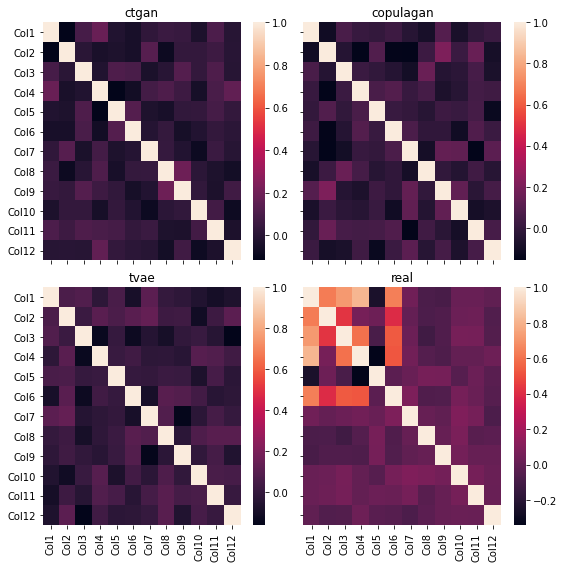

In [18]:
corr_plot(test_dict)

We can see that the correlation has been poorly preserved.

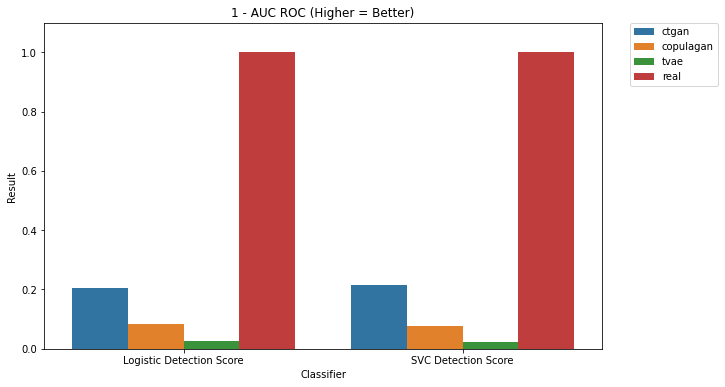

In [19]:
plot_classifier_metrics(simple_metrics(test_dict, input_dataset=i_ds1))

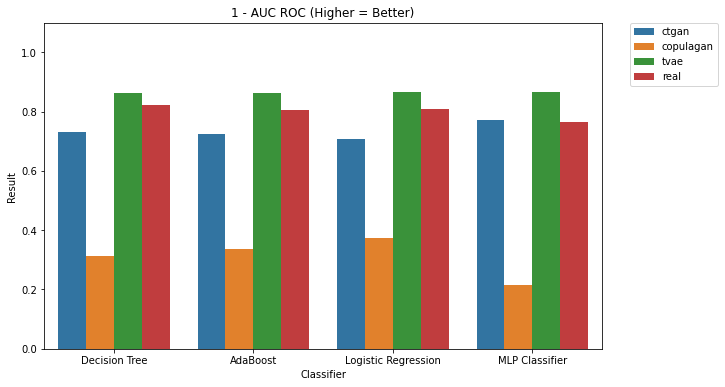

In [20]:
plot_classifier_metrics(classifier_comparison(test_dict, input_dataset= i_ds1, 
                                              target_col='Class_att'))

# View impact of other params

In [21]:
def model_run(input_dataset, output_dataset, run_params, target_col):

    df_dict = sdv_dataset_synthesizer(input_dataset=input_dataset,
                                      output_dataset=output_dataset,
                                      run_params=run_params)

    df_dict['real'] = input_dataset.dataset
    
    corr_plot(df_dict)
    plot_classifier_metrics(simple_metrics(df_dict, 
                                           input_dataset=input_dataset))
    
    plot_classifier_metrics(classifier_comparison(df_dict, 
                                                  input_dataset=input_dataset,
                                                  target_col=target_col))
    
    return df_dict

## More epochs, smaller batch size

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.29it/s]


Running for ctgan
Running for copulagan
Running for tvae


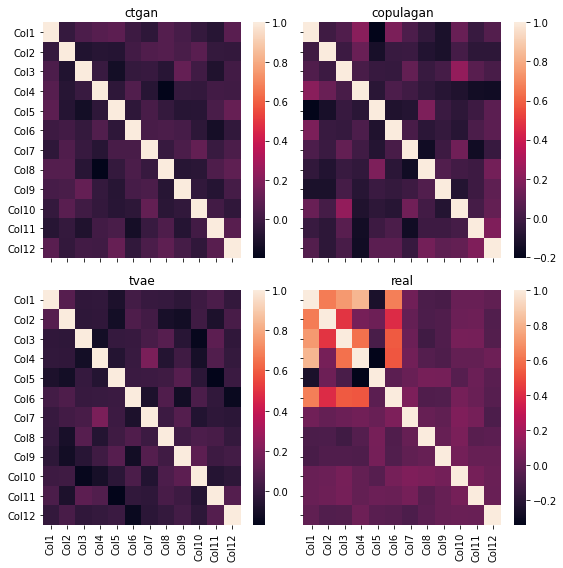

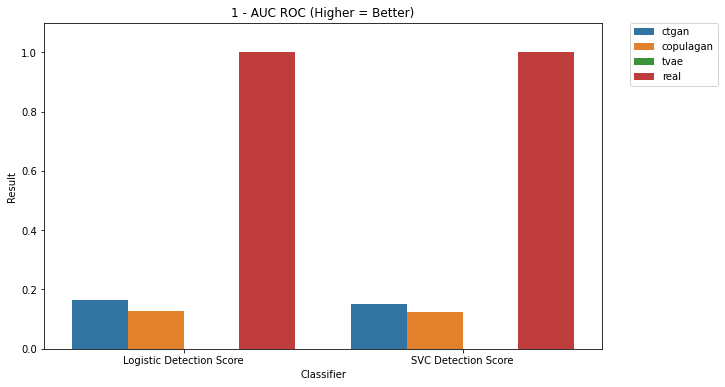

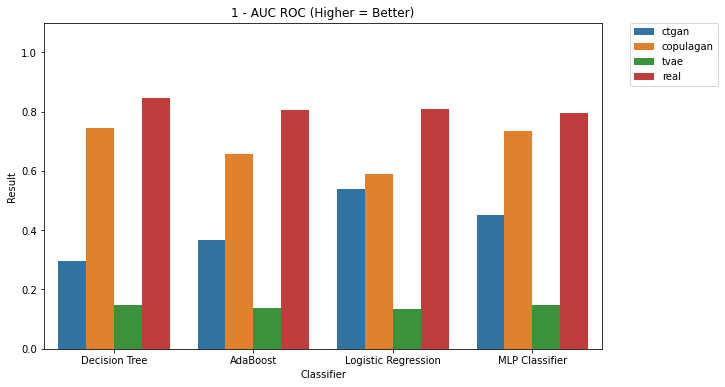

In [22]:
rp2_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=500, batch_size=100)

v2_df_dict = model_run(input_dataset=i_ds1, output_dataset=o_ds1, 
          run_params=rp2_ds1, 
          target_col='Class_att')

## More layers - 3 layers per network (default = 2)

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:00<00:00, 11.62it/s]

Running for ctgan
Running for copulagan
Running for tvae


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.23it/s]


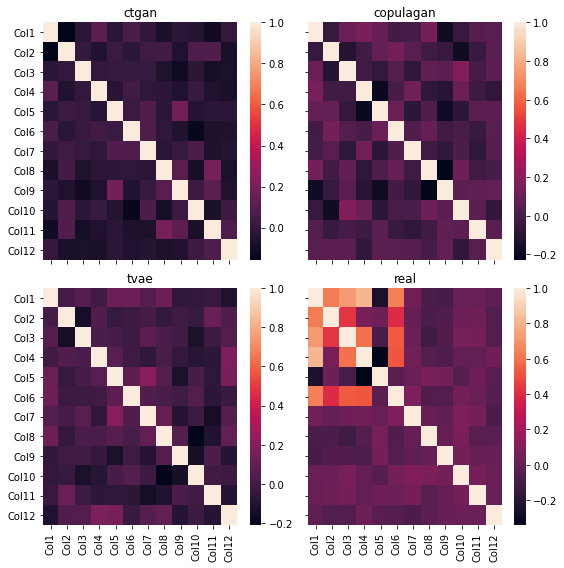

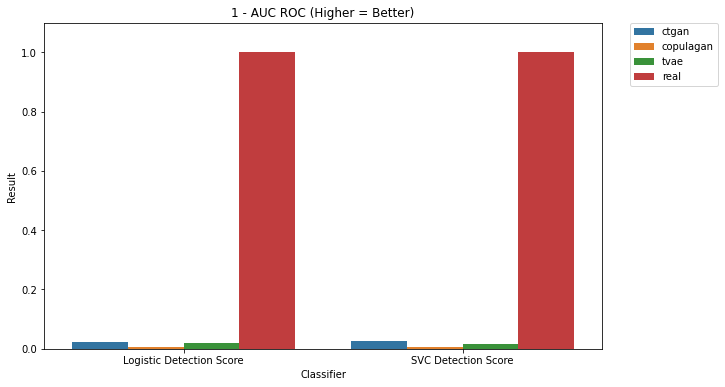

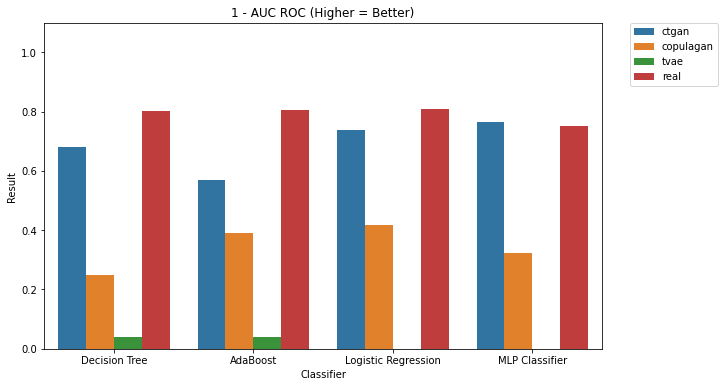

In [31]:
rp3_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             generator_dim=(256, 256, 256),
                             discriminator_dim=(256, 256, 256))

v3_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp3_ds1, 
          target_col='Class_att')

## Even more layers - 4 layers per network

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 17.80it/s]


Running for ctgan
Running for copulagan
Running for tvae


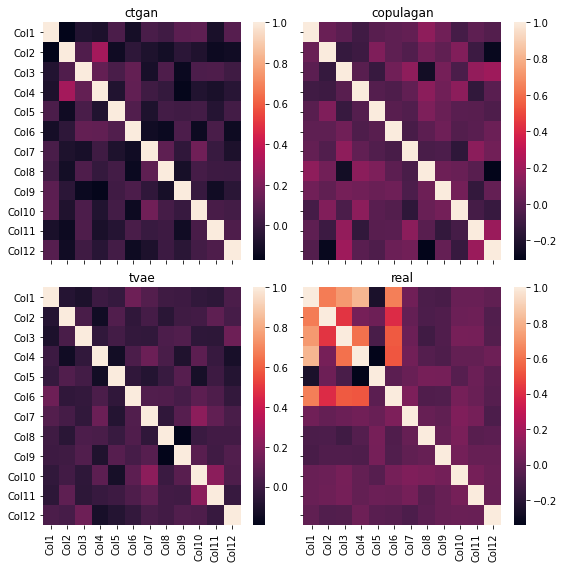

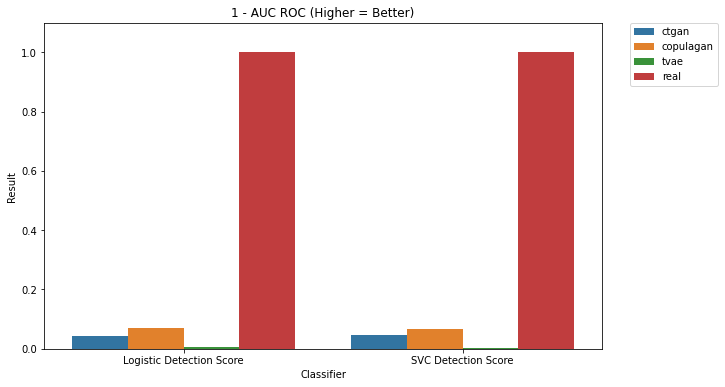

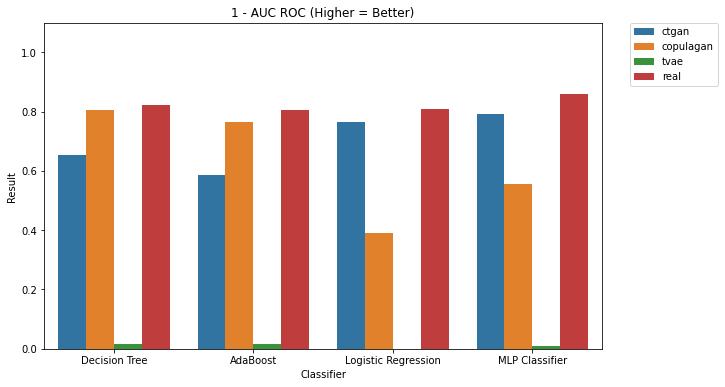

In [24]:
rp4_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             generator_dim=(256, 256, 256, 256),
                             discriminator_dim=(256, 256, 256, 256))

v4_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp4_ds1, 
          target_col='Class_att')

## Even more layers (again) - 5 layers per network

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Running for ctgan
Running for copulagan


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.39it/s]


Running for tvae


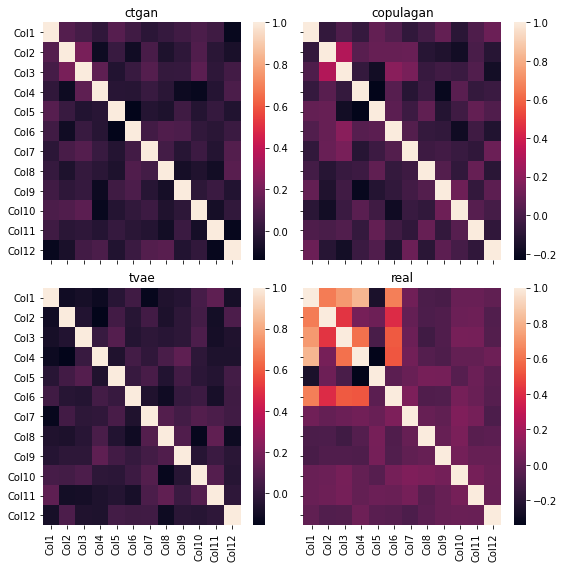

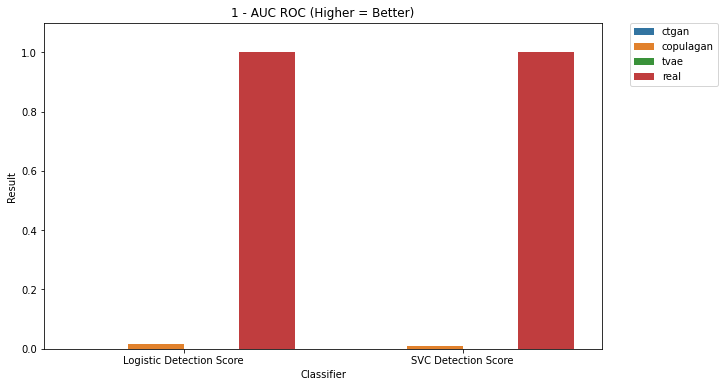

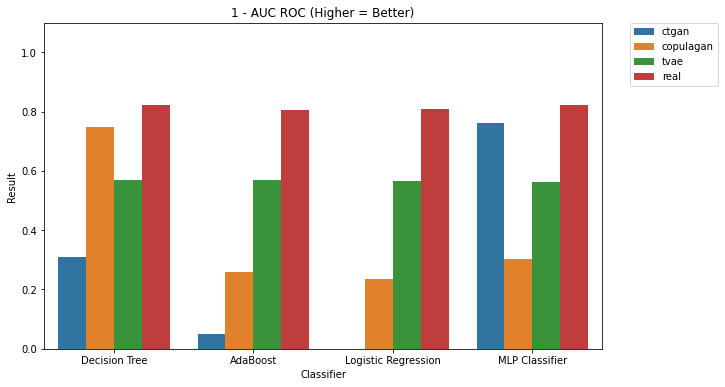

In [25]:
rp5_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             generator_dim=(256, 256, 256, 256, 256),
                             discriminator_dim=(256, 256, 256, 256, 256))

v5_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp5_ds1, 
          target_col='Class_att')

## 5 layers (unchanged from previous run), longer training too

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:00<00:00, 11.59it/s]

Running for ctgan
Running for copulagan
Running for tvae


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.27it/s]


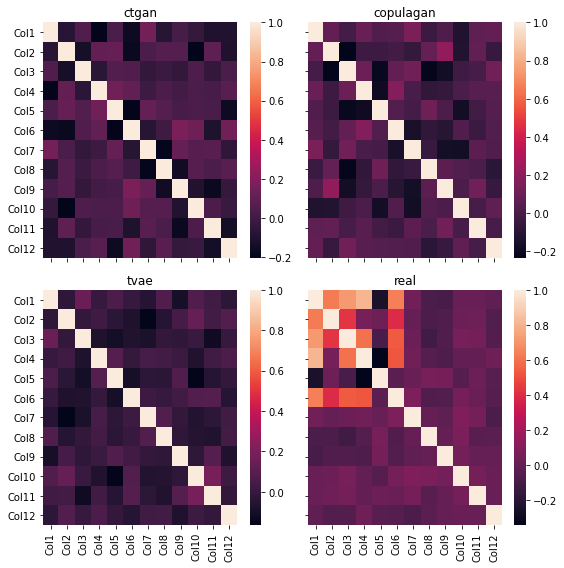

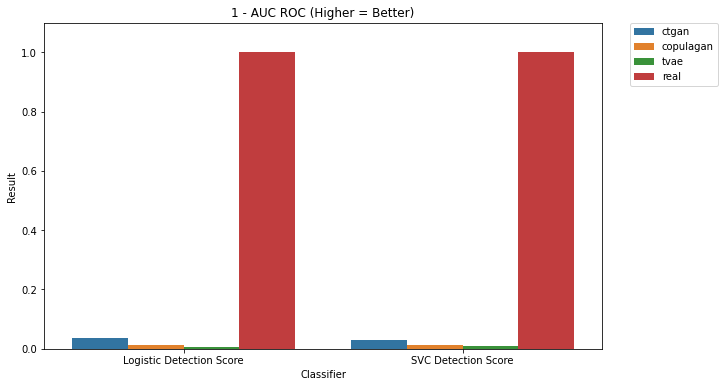

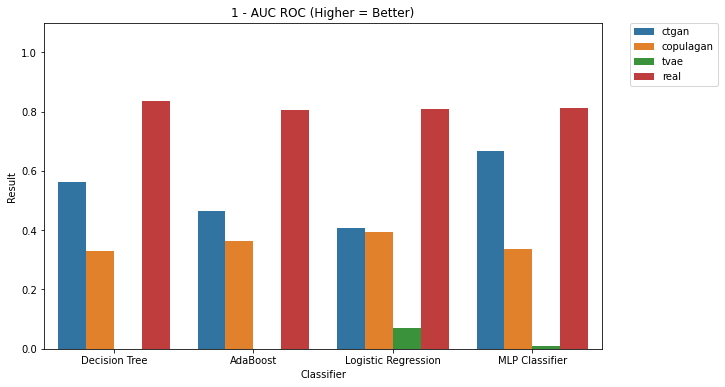

In [26]:
rp6_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=500,
                             generator_dim=(256, 256, 256, 256, 256),
                             discriminator_dim=(256, 256, 256, 256, 256))

v6_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp6_ds1, 
          target_col='Class_att')

## 5 layers (unchanged from previous run), longer training (unchanged from previous run), smaller batch size

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:00<00:00, 10.28it/s]

Running for ctgan
Running for copulagan


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 13.80it/s]


Running for tvae


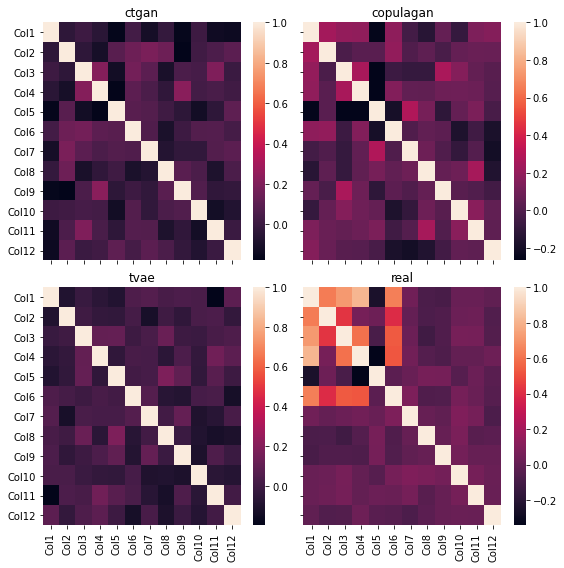

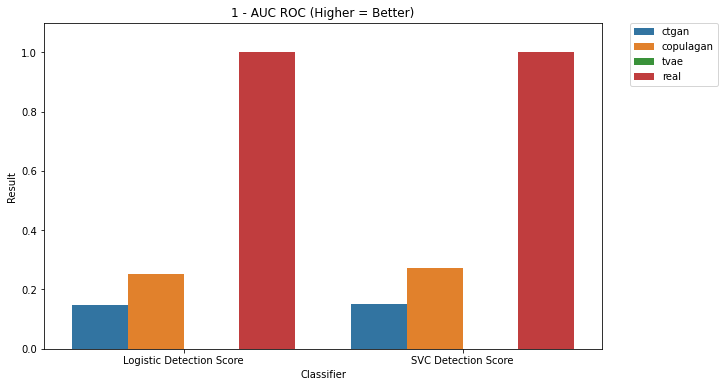

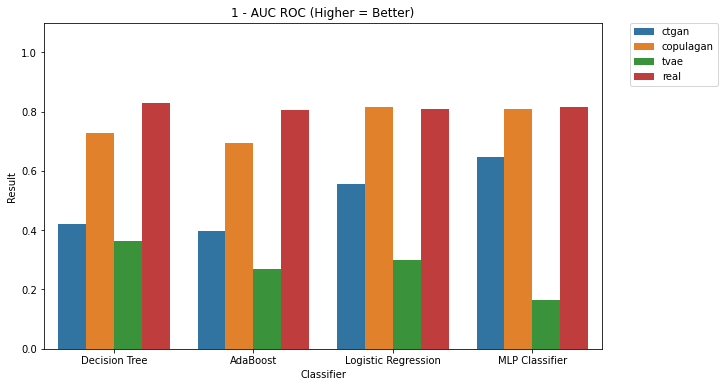

In [27]:
rp7_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=500, batch_size=100,
                             generator_dim=(256, 256, 256, 256, 256),
                             discriminator_dim=(256, 256, 256, 256, 256))

v7_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp7_ds1, 
          target_col='Class_att')

## Increase run length further (500 --> 1000 epochs)

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:00<00:00, 11.66it/s]

Running for ctgan
Running for copulagan
Running for tvae


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.51it/s]


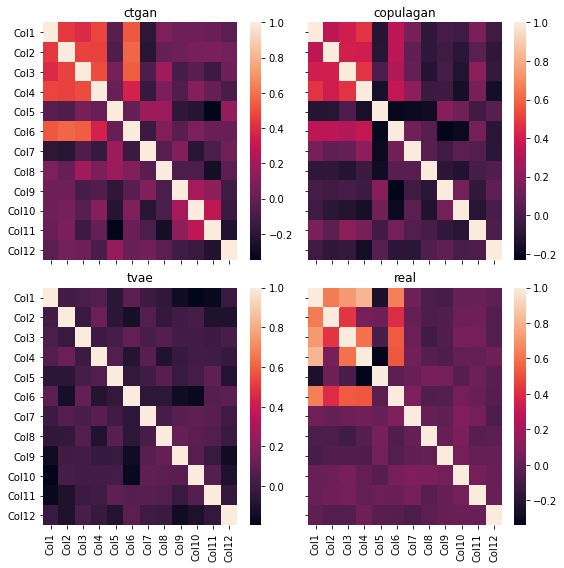

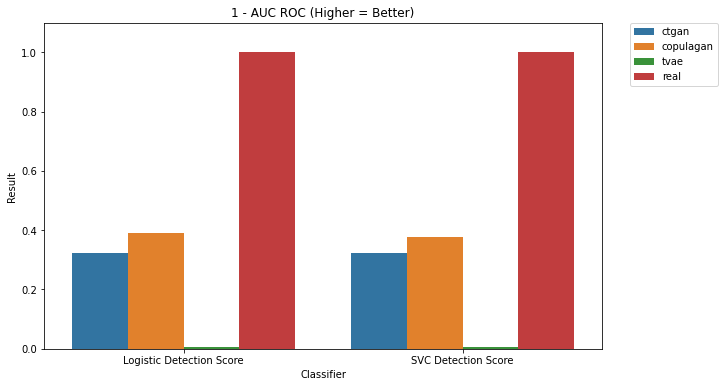

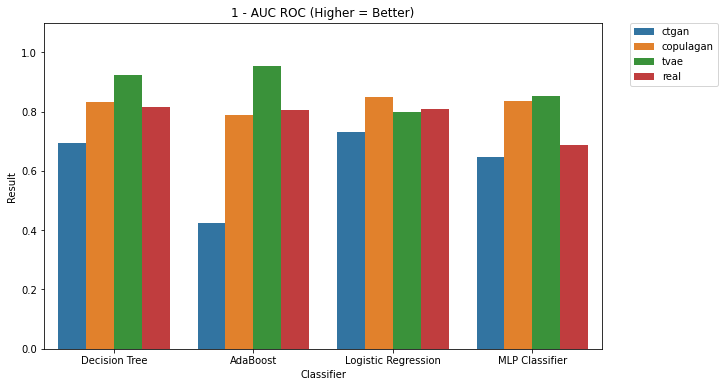

In [28]:
rp8_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=1000, batch_size=100,
                             generator_dim=(256,256,256, 256, 256),
                             discriminator_dim=(256,256,256, 256, 256))

v8_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp8_ds1, 
          target_col='Class_att')

For the first time we've started to see a correlation pattern that is similar to that observed in the real dataset with CTGAN.

However, the data is still being detected as fake, and it isn't performing all that well in 

## Increase run length even further (1000 --> 2000 epochs)

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:00<00:00, 11.39it/s]

Running for ctgan
Running for copulagan


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.12it/s]


Running for tvae


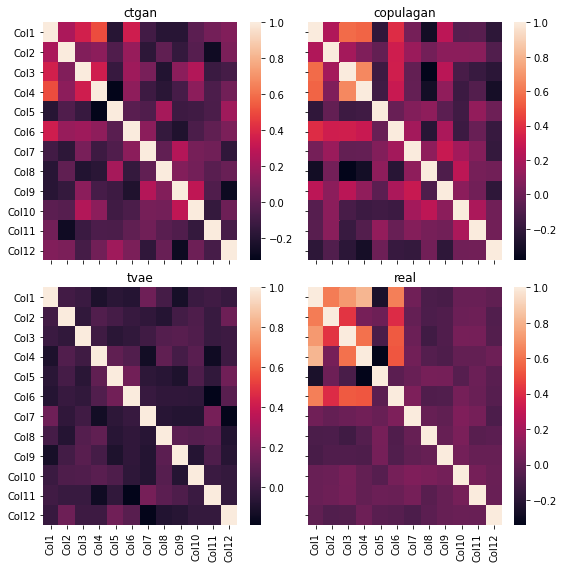

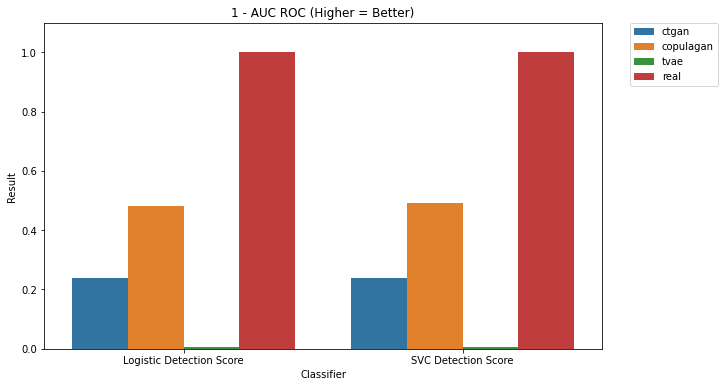

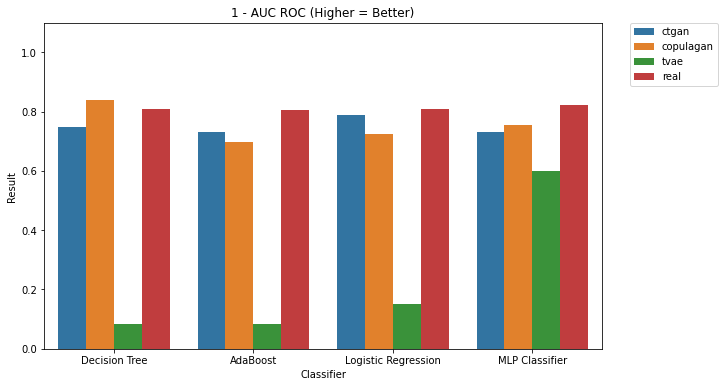

In [29]:
rp9_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=2000, batch_size=100,
                             generator_dim=(256, 256, 256, 256, 256),
                             discriminator_dim=(256, 256, 256, 256, 256))

v9_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp9_ds1, 
          target_col='Class_att')

## Add another layer (5 --> 6) and use 2000 epochs

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Running for ctgan
Running for copulagan


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.70it/s]


Running for tvae


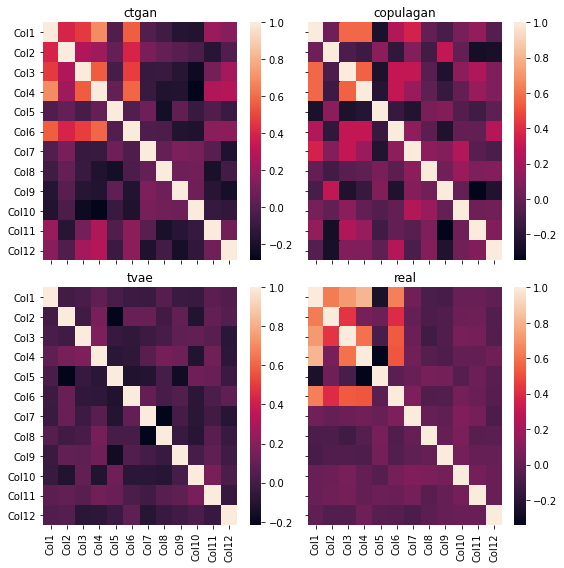

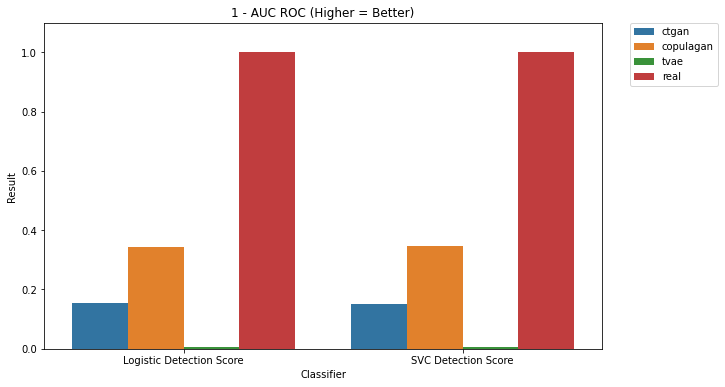

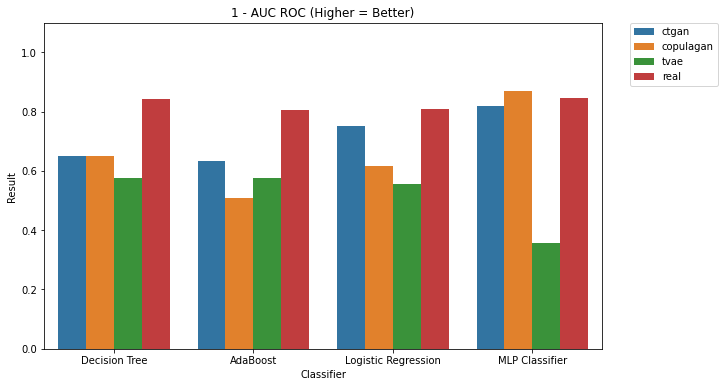

In [30]:
rp10_ds1 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=2000, batch_size=100,
                             generator_dim=(256, 256, 256, 256, 256, 256),
                             discriminator_dim=(256, 256, 256, 256, 256, 256))

v10_df_dict = model_run(input_dataset=i_ds1, 
          output_dataset=o_ds1, 
          run_params=rp10_ds1, 
          target_col='Class_att')

## Export datasets

In [34]:
v8_df_dict['ctgan'].to_csv('../syn_data/back_pain_ctgan_bergam0t_v1.csv')
v8_df_dict['copulagan'].to_csv('../syn_data/back_pain_copulagan_bergam0t_v1.csv')
v8_df_dict['tvae'].to_csv('../syn_data/back_pain_tvae_bergam0t_v1.csv')

v9_df_dict['ctgan'].to_csv('../syn_data/back_pain_ctgan_bergam0t_v2.csv')
v9_df_dict['copulagan'].to_csv('../syn_data/back_pain_copulagan_bergam0t_v2.csv')
v9_df_dict['tvae'].to_csv('../syn_data/back_pain_tvae_bergam0t_v2.csv')

v10_df_dict['ctgan'].to_csv('../syn_data/back_pain_ctgan_bergam0t_v3.csv')
v10_df_dict['copulagan'].to_csv('../syn_data/back_pain_copulagan_bergam0t_v3.csv')
v10_df_dict['tvae'].to_csv('../syn_data/back_pain_tvae_bergam0t_v3.csv')

## Try dropping col 13

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:00<00:00, 11.46it/s]

Running for ctgan
Running for copulagan


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 15.27it/s]


Running for tvae


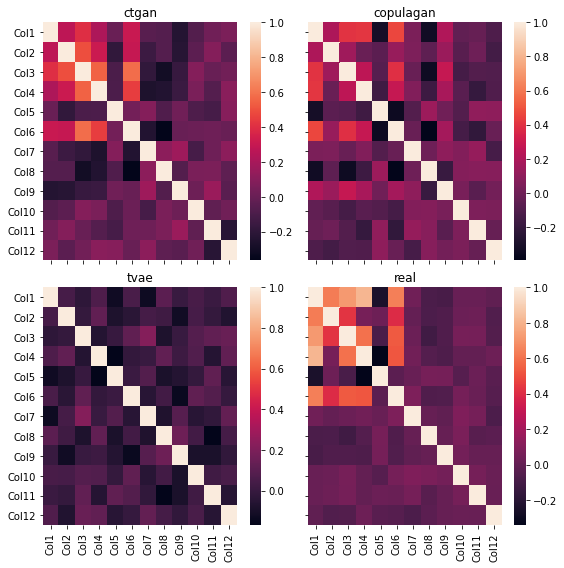

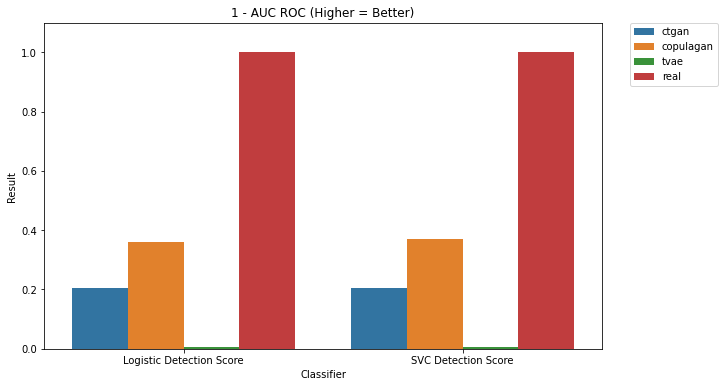

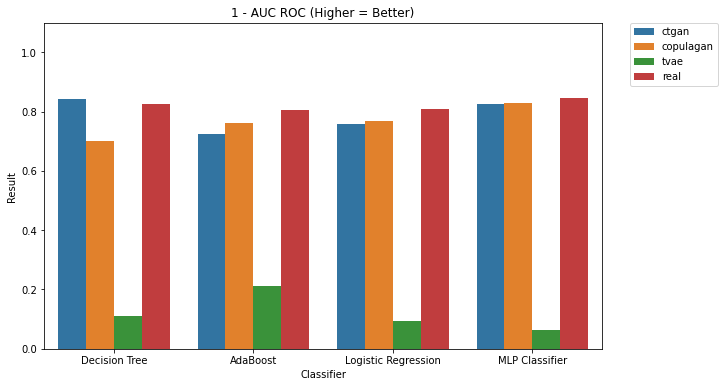

In [37]:
ds_no_col13 = pd.read_csv('../data/back_pain.csv', header=0)

i_ds1a = SDVInputDataset(real_dataframe=ds_no_col13)

v8a_df_dict = model_run(input_dataset=i_ds1a, 
                        output_dataset=o_ds1, 
                        run_params=rp8_ds1, 
                        target_col='Class_att')

In [38]:
v8a_df_dict['ctgan'].to_csv('../syn_data/back_pain_ctgan_bergam0t_v1a_no_col_13.csv')
v8a_df_dict['copulagan'].to_csv('../syn_data/back_pain_copulagan_bergam0t_v1a_no_col_13.csv')
v8a_df_dict['tvae'].to_csv('../syn_data/back_pain_tvae_bergam0t_v1a_no_col_13.csv')

# Look at other dataset

In [35]:
i_ds2 = SDVInputDataset(filepath='../data/cervical_cancer.csv',
                       header=0)
o_ds2 = SDVOutputDataset(len(i_ds1.dataset))
rp_ds2 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'])

In [37]:
i_ds2.dataset.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


 67%|███████████████████████████████████████████████████████████████████████████████▎                                       | 2/3 [00:00<00:00, 10.44it/s]

Running for ctgan
Running for copulagan


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 11.57it/s]


Running for tvae


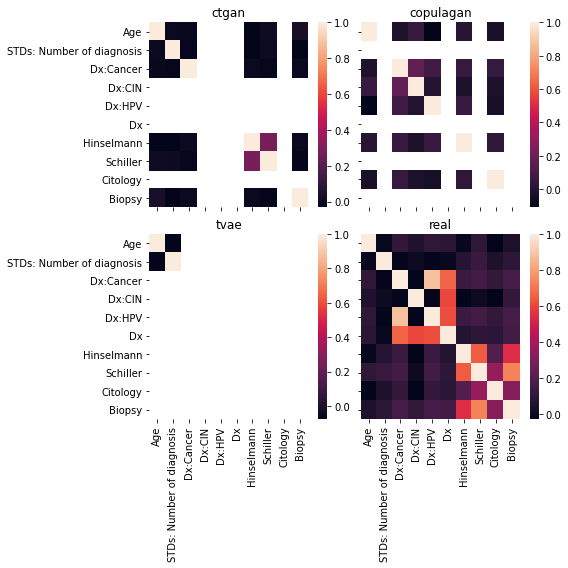

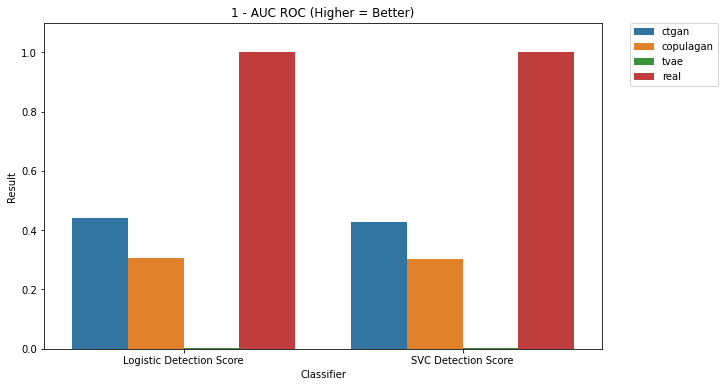

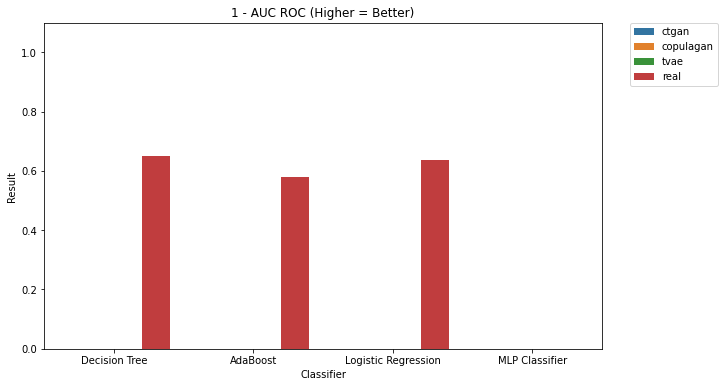

In [38]:
v1_cerv_cancer_df_dict = model_run(input_dataset=i_ds2, 
                                  output_dataset=o_ds2, 
                                  run_params=rp_ds2, 
                                  target_col='Biopsy')

 33%|███████████████████████████████████████▋                                                                               | 1/3 [00:00<00:00,  7.65it/s]

Running for ctgan
Running for copulagan


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.95it/s]


Running for tvae


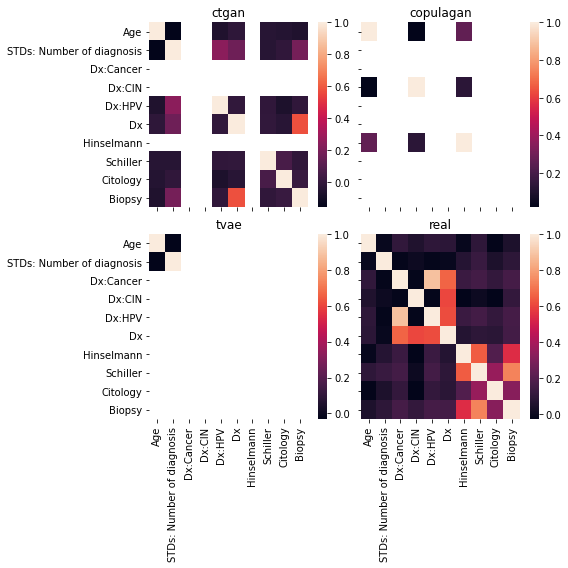

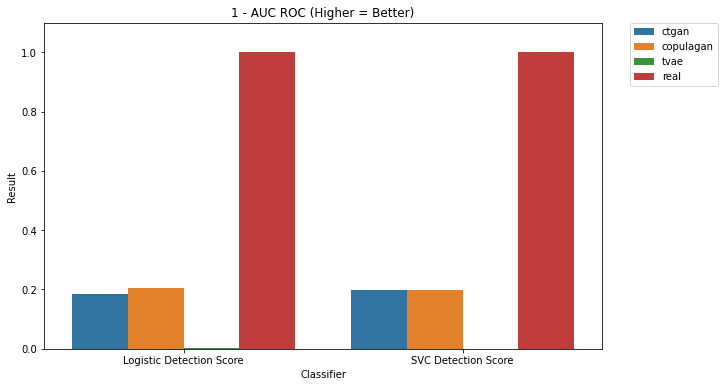

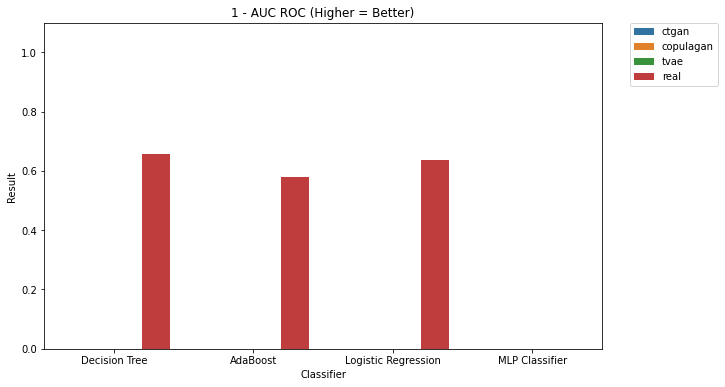

In [39]:
rp2_ds2 = SDVUniversalParams(models_to_run=['ctgan', 'copulagan', 'tvae'],
                             epochs=2000, batch_size=100,
                             generator_dim=(256, 256, 256, 256, 256, 256),
                             discriminator_dim=(256, 256, 256, 256, 256, 256))

v2_cerv_cancer_df_dict = model_run(input_dataset=i_ds2, 
                                   output_dataset=o_ds2, 
                                   run_params=rp2_ds2, 
                                   target_col='Biopsy')